## DATA PROJECT: MONA AND VAR-MODELS

**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction To Our Dataproject](#toc1_)    
- 2. [Data structure](#toc2_)    
- 3. [Variables](#toc3_)    
- 4. [Model Stability](#toc4_) 
- 5. [Impulse Response Function](#toc5_) 
- 6. [Conclusion](#toc6_)

## 1. <a id='toc1_'></a>[Introduction To Our Dataproject](#toc0_)

In this project, we base our work on the data and models our group member has developed in her bachelor's thesis (*F24: The Impact of Interest Rate Changes on Economic Growth and Inflation*), and we decided to use this project as a help and as an assessment of the model run in the BA-thesis. 

We use data from **MONA**, which is maintained by the Danish Central Bank. We have selected four main variables from the MONA dataset: the **monetary policy interest rate**, **output**, **inflation**, and the **effective krone exchange rate**. We aim to model their effects on each other through a VAR model and impulse response functions.

We start by importing the relevant modules to then begin our coding.

**pandas** which is essential for our analysis and manipulation of data

**numpy** which is essential for our working with numerical data

**matplotlib** which is important for us to visualise our results by plots

**statsmodels** which provides us with the relevant tools for our statistical model and hypothesis testing. From this we import the Dickey-Fueller test and the VAR model.

**seaborn and tabulate** which we use to make our graphs/tables more aesthetic.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
import seaborn as sns
from tabulate import tabulate

## 2. <a id='toc2_'></a>[Data Structure](#toc0_)

This code loads the Mona2023 Excel file into a pandas DataFrame. We ensure that the comma decimal separators are correctly interpreted. We clean the data frame by removing  empty columns, and we rename a column to 'Indicator' for clarity. We transpose the data frame so that the rows (time periods) become columns (now representing different indicators or variables). The transposed data frame has its first row (now containing the indicators' names) set as column headers for easier data manipulation. The cleaned and transposed data frame is then saved to a new Excel file (cleaned_and_transposed_monadata2023.xlsx) and the first ten rows of the dataset are displayed below after running the code. 

In [23]:
mona_data = pd.read_excel('monadata2023.xlsx', decimal=',')

# Dropping empty columns to clean the dataset
mona_data.dropna(axis=1, how='all', inplace=True)

# Renaming the first column
mona_data.rename(columns={'Unnamed: 0': 'Indicator'}, inplace=True)

# Transposing the dataset to later use this for our analysis
mona_data_transposed = mona_data.T

# Then we rename the first row after transposing
mona_data_transposed.rename(columns=mona_data_transposed.iloc[0], inplace=True)
mona_data_transposed.drop(mona_data_transposed.index[0], inplace=True)

# Saving the cleaned and transposed data as cleaned_and_transposed_monadata2023.xlsx in the same folder
mona_data_transposed.to_excel('cleaned_and_transposed_monadata2023.xlsx', index=True)

mona_data_transposed.head(10)

,tttt,d100q1,d7734,d78q4,d8081,d88q1,dmims,drad,dral,dtye_,...,logywby,logywla,logywo,dlogfyfbx,dlogws_z_h,fcpw,kbw,dtkbw,gfcp,gfipbxe
1971q1,1.971,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,3.915119,0.169817,3.006204,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1971q2,1.97125,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,3.933617,0.140318,3.013863,-0.009158,NaN,NaN,NaN,0.0,NaN,NaN
1971q3,1.9715,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,3.94949,0.112452,3.083522,-0.007943,NaN,NaN,NaN,0.0,NaN,NaN
1971q4,1.97175,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,3.965134,0.146839,3.091395,-0.009509,NaN,NaN,NaN,0.0,NaN,NaN
1972q1,1.972,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,3.991326,0.167208,3.128989,0.011746,NaN,NaN,NaN,0.0,NaN,NaN
1972q2,1.97225,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,4.017188,0.186144,3.169424,0.038418,NaN,NaN,904.231712,0.0,NaN,NaN
1972q3,1.9725,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,4.044204,0.17873,3.216151,0.022967,NaN,NaN,920.163144,0.0,NaN,NaN
1972q4,1.97275,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,4.080434,0.167791,3.221065,-0.009002,NaN,NaN,910.598539,0.0,NaN,NaN
1973q1,1.973,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,4.104671,0.260679,3.256748,0.020354,NaN,NaN,925.457897,0.0,NaN,NaN
1973q2,1.97325,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,...,4.143921,0.260652,3.316224,-0.007862,0.137079,483.28889,914.910247,0.0,NaN,NaN


## 3. <a id='toc3_'></a>[Variables](#toc0_)

Our aim is to structure a VAR model consisting of the variables interest rate (imm), output (fy), exchange rate (efkrks), and inflation (pcpdk) from the transposed MONA dataset. 

In the first part we load the dataset, which is given in Excel-format, and read it in python. We then transpose the dataset to better structure the data and have variables in the columns instead of rows. We also define the data as quarterly data. 
We define the variable names and run a dicky-fuller distribution test to check for stationarity and need for first-differencing.

Due to there being many empty cells in MONA we run a code to check and remove the NaNs and infs. Finally we print the ten first observations of the relevant variables in MONA.

We rename the variables to what they are known as in order to enhance readability. 

We print a table describing the results of the dickey-fuller distribution, and show whether the variables were stationary or if we had to apply first differencing to make them stationary for our model.

In [24]:
# Converting the index into a PeriodIndex of quarterly data using pandas
mona_data_transposed.index = pd.PeriodIndex(mona_data_transposed.index, freq='Q')

variable_names = ['interest rate', 'exchange rate', 'output', 'inflation']
original_variable_names = ['imm', 'efkrks', 'fy', 'pcpdk']

# We create a mapping from original names to new names
variable_rename_map = dict(zip(original_variable_names, variable_names))

# ADF to check for stationarity and take first difference if necessary and storing the results.
def check_stationarity_and_difference(df, variable):
    series = df[variable].astype(float)  # Ensure the data type is float for the adfuller test
    result = adfuller(series.dropna())
    
    adf_result = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4],
        'Stationarity': 'Stationary' if result[1] <= 0.05 else 'Non-stationary'
    }
    
    if result[1] > 0.05:  # Non-stationary, take first difference
        series_diff = series.diff().dropna()
        return series_diff, adf_result
    else:
        return series, adf_result

adf_results = {}

# Applying the stationarity check and differencing to our variables
for original_variable in original_variable_names:
    mona_data_transposed[original_variable], adf_results[original_variable] = check_stationarity_and_difference(mona_data_transposed, original_variable)

# Dropping NaN and infinite values
mona_data_transposed.dropna(inplace=True)

mona_data_transposed.replace([np.inf, -np.inf], np.nan, inplace=True)
mona_data_transposed.dropna(inplace=True)

# Double-checking whether there still are any NaNs or infs in the data
assert not mona_data_transposed.isnull().values.any(), "NaN values detected"
assert not np.isinf(mona_data_transposed.values).any(), "Inf values detected"

# Renaming the variables used in the dataframe
mona_data_transposed.rename(columns=variable_rename_map, inplace=True)

# Creating our table of statistical results
table_data = []
for original_variable in original_variable_names:
    result = adf_results[original_variable]
    row = [
        variable_rename_map[original_variable],
        f"{result['ADF Statistic']:.3f}",
        f"{result['p-value']:.3f}",
        f"{result['Critical Values']['5%']:.3f}",
        result['Stationarity'],
        'Yes' if result['Stationarity'] == 'Non-stationary' else 'No'
    ]
    table_data.append(row)

print(tabulate(table_data, headers=["Variable", "ADF Statistic", "p-value", "5% Critical Value", "Stationarity", "First Difference Applied"], tablefmt="heavy_outline"))


┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Variable      ┃   ADF Statistic ┃   p-value ┃   5% Critical Value ┃ Stationarity   ┃ First Difference Applied   ┃
┣━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ interest rate ┃          -1.117 ┃     0.708 ┃              -2.877 ┃ Non-stationary ┃ Yes                        ┃
┃ exchange rate ┃          -2.09  ┃     0.249 ┃              -2.876 ┃ Non-stationary ┃ Yes                        ┃
┃ output        ┃           0.573 ┃     0.987 ┃              -2.876 ┃ Non-stationary ┃ Yes                        ┃
┃ inflation     ┃          -1.807 ┃     0.377 ┃              -2.876 ┃ Non-stationary ┃ Yes                        ┃
┗━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


The results of the Augmented Dickey-Fuller (ADF) test for stationarity for each variable are as follows:

For the interest rate, the ADF statistic is -1.117, and the p-value is 0.708. Since the p-value is greater than 0.05, the series is non-stationary, and the first difference has been applied.

For the exchange rate, the ADF statistic is -2.09, and the p-value is 0.249. Like the interest rate, the series is non-stationary, and the first difference has been applied.

For output, the ADF statistic is 0.5730, and the p-value is 0.987. The series is non-stationary, and the first difference has been applied.

For inflation, the ADF statistic is -1.807, and the p-value is 0.377. The series is non-stationary, and the first difference has been applied.


After applying the first difference to all non-stationary variables, we print the first ten observations of the transformed data, as seen on the table below starting from 1999Q1.

In [25]:
first_ten_observations_specific = mona_data_transposed[variable_names].head(10)
print(tabulate((first_ten_observations_specific), headers=["quarter", "interest rate", "exchange rate", "output", "inflation"], tablefmt="heavy_outline"))

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ quarter   ┃   interest rate ┃   exchange rate ┃   output ┃   inflation ┃
┣━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃ 1999Q1    ┃    -0.00960628  ┃       -1.61963  ┃  14.3648 ┃  0.00482527 ┃
┃ 1999Q2    ┃    -0.00641098  ┃       -1.37033  ┃   8.2612 ┃  0.00489992 ┃
┃ 1999Q3    ┃    -0.000876472 ┃       -0.810967 ┃   9.9388 ┃  0.00701135 ┃
┃ 1999Q4    ┃     0.00208594  ┃       -0.908467 ┃  22.6328 ┃  0.0067624  ┃
┃ 2000Q1    ┃     0.00359337  ┃       -1.3916   ┃  15.998  ┃  0.00576316 ┃
┃ 2000Q2    ┃     0.00697685  ┃       -1.28947  ┃  18.8596 ┃  0.00543676 ┃
┃ 2000Q3    ┃     0.00605903  ┃       -0.373733 ┃   4.6284 ┃  0.00404687 ┃
┃ 2000Q4    ┃     0.00496492  ┃       -0.336133 ┃  16.4284 ┃  0.0061824  ┃
┃ 2001Q1    ┃    -0.000217852 ┃        2.19033  ┃ -18.42   ┃  0.00371773 ┃
┃ 2001Q2    ┃    -0.00070462  ┃       -0.834633 ┃   8.1924 ┃  0.00678877 ┃
┗━━━━━━━━━━━┻━━━━━━━━━━━━

## 4. <a id='toc4_'></a>[Model Stability](#toc0_)

<span style="color:orange;">*We have used the help of AI, chatgpt, to help us define our VAR model correctly.*

In the following we define our VAR model and print the OLS regression results.
The code provides a confirmation of the model's stability, which suggests reliable forecasting. 
The model assesses how past values of the defined variables correlate over time. Overall we find a significant positive persistence in interest rates and exchange rates, indicating they influence their own future values. Output and inflation are also significantly influenced by their own past, revealing a pattern of self-reinforcement within the variables. The correlation matrix suggests that the residuals are sufficiently independent of each other, supporting the model's validity.

In [26]:
model = VAR(mona_data_transposed[variable_names])
var_results = model.fit()

# We run a stability check on our model to see if it is stable and thus can be interpreted 
is_model_stable = var_results.is_stable()
print(f"Model is stable: {is_model_stable}")

# If the model is unstable, we try increasing the number of lags
if not is_model_stable:
    # Try with more lags and check the stability of each model
    for i in range(1, 6):  # Assumption: Check up to 5 lags
        var_results = var_model.fit(i)
        if var_results.is_stable():
            print(f"Model with {i} lags is stable.")
            break
    else:
        print("No stable model found for up to 5 lags.")

print(var_results.summary())

Model is stable: True
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jun, 2024
Time:                     17:10:59
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -16.5629
Nobs:                     69.0000    HQIC:                  -16.9536
Log likelihood:           222.134    FPE:                3.35763e-08
AIC:                     -17.2105    Det(Omega_mle):     2.53806e-08
--------------------------------------------------------------------
Results for equation interest rate
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.001312         0.000748           -1.753           0.080
L1.interest rate         0.404312         0.101673            3.977           0.000
L1.exchange rate  

To analyze the relationships among the interest rate, exchange rate, output, and inflation, we used a Vector Autoregressive (VAR) model. The model is specified as VAR(2), meaning it includes two lags for each variable. This two-lag specification was chosen to capture potential delayed effects and ensure the model adequately reflects the dynamic interactions over time. ([Reference](https://www.r-econometrics.com/timeseries/varintro/?fbclid=IwZXh0bgNhZW0CMTAAAR1vIWncupFnvYgJzukNgAWiYmAZchUFpeTmcZIXPHq82ZG3ovAOuA_UgVY_aem_u5kxtA_IAcaCf6426JfXUg))

The results indicate that the interest rate is significantly influenced by its own past values and the lagged output, suggesting these variables' persistence. The exchange rate is primarily influenced by its own lagged values, highlighting its autoregressive nature. Output is also influenced by its own past values, demonstrating similar persistence. Inflation is influenced by its own lagged values and a constant term, reflecting the importance of past inflation rates and other consistent factors.

This VAR(2) model thus provides insights into how past values of these economic variables influence their current behavior, emphasizing the interdependencies and delayed effects captured by the chosen lag length.

## 5. <a id='toc5_'></a>[Impulse Response Function](#toc0_)

<span style="color:orange;">*We have used the help of AI, chatgpt, to generate the impulse response functions.*

We now visualize the effect of a shock to interest rates, and the other variables, effect on each other through impulse response functions to support our analysis. To do this we plot impulse response functions based on the VAR model we defined and fitted in the first code.

<Figure size 1400x1000 with 0 Axes>

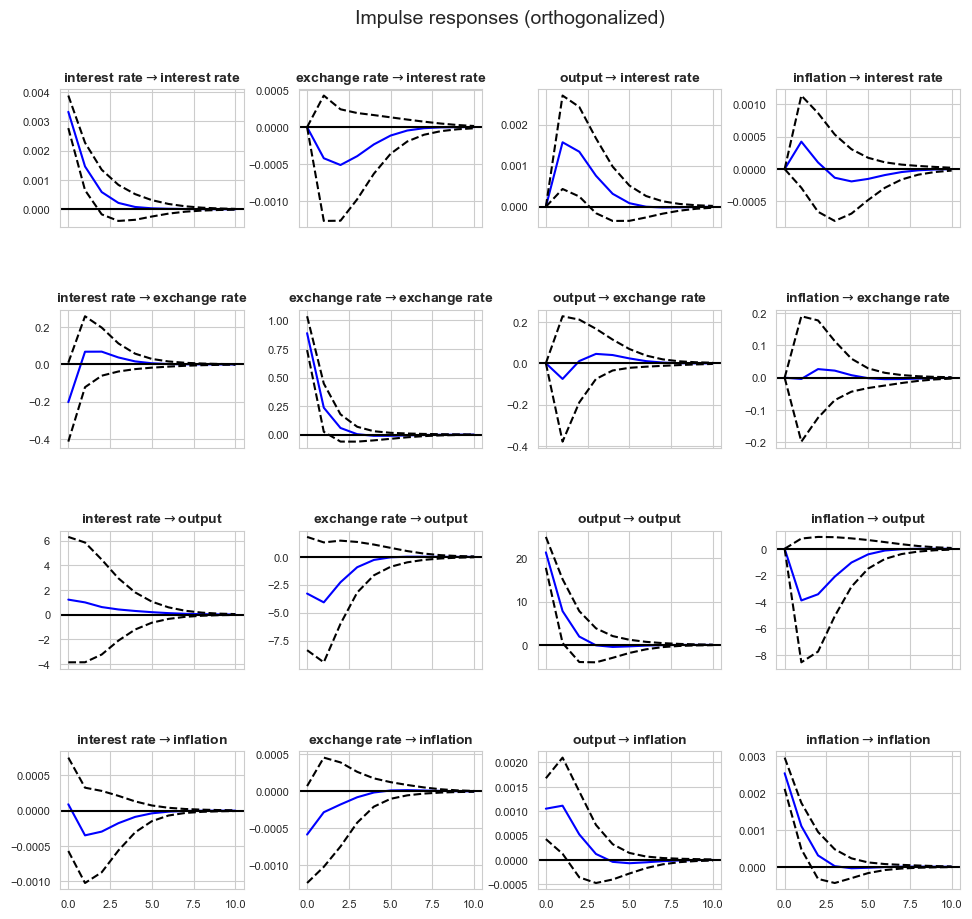

In [27]:
# We analyze the orthogonalized impulses over 10 periods, plot them and fix the overall aesthetics.
irf_renamed = var_results_renamed.irf(10)  

plt.figure(figsize=(14, 10))

irf_plot = irf_renamed.plot(orth=True) 

sns.set_style('whitegrid')

for i, ax in enumerate(irf_plot.axes):
    # We improve spacing and font sizes for clarity
    ax.set_title(ax.get_title(), fontsize=10, fontweight='bold')
    ax.xaxis.label.set_visible(False)  
    ax.yaxis.label.set_visible(False)  
    ax.tick_params(labelsize=8)      

plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.6, wspace=0.3)

plt.show()


The impulse response functions indicate how different economic variables react to shocks over time. An interest rate shock initially leads to a positive response in interest rates, followed by a reversion towards the original state. The exchange rate shows a minimal response, while output and inflation decrease, suggesting that an increase in interest rates might suppress both economic activity and price levels. Shocks to other variables—exchange rate, output, and inflation—show varied impacts on each other and themselves. These responses, within 95% confidence intervals, highlight the interplay and dynamic nature of the chosen macroeconomic variables.

## 6. <a id='toc6_'></a>[Conclusion](#toc0_)

We have utilized a VAR model to explore the interactions between economic indicators such as interest rates, output, exchange rate, and inflation from the MONA dataset. The VAR model was chosen for its effectiveness in capturing the dynamic relationships among these variables, crucial to depict the dynamics of economic fluctuations.

Our approach involved detailed data preparation, where we structured the data by transposing and cleaning it to ensure accuracy and completeness. We addressed challenges such as non-stationarity and missing values, ensuring that our dataset was robust for econometric analysis.

The insights derived from our model highlight the interplay of these economic variables, providing a nuanced understanding of their impacts over time. For example, the responsiveness of the interest rate to shifts in other indicators offers valuable perspectives on potential monetary policy adjustments.

This data project has highlighted the importance of detailed data structuring and econometric modeling in our economic research. 
Overall we can conclude that increases in interest rates affect interest rates positively in future periods, whilst suppressing output and inflation, and having minimal effect on the exchange rates. These are vital results that the Danish Central Bank must have in consideration when structuring their monetary policy.